Desenvolver um programa em Python para calcular as frequências naturais de vibração e os modos normais (deslocamentos relativos) de sistemas massa-mola unidimensionais com as massas das pontas presas a paredes por molas, e analisar como variações nas massas e nas constantes de mola influenciam o comportamento do sistema.

 

# Instruções:
### Sistema com duas massas e extremidades fixas:

Modele um sistema de duas massas conectadas por uma mola, com as extremidades também ligadas a paredes por molas adicionais.

Inicialmente, use:

Massas iguais: m_1 = m_2 = 1kg

Constantes de mola iguais: k = 1\,\text{N/m} em todas as molas
 
 -----------------------------------------------------------------------------------------------------------------------------

Em seguida, varie m_2 mantendo m_1 fixo e observe:

 

Mudança nas frequências naturais

Alteração dos modos normais (forma dos deslocamentos relativos)


### Extensão para três massas com extremidades fixas:

 

Modele uma cadeia de três massas ligadas entre si por molas e com molas também conectando a primeira e a última massa a paredes rígidas.

Estude diferentes distribuições de massa:

 

Todas iguais

Apenas uma diferente

Todas diferentes

 

### Analise:

 

Como a variação das massas afeta as frequências

Como se modificam os padrões dos modos normais

 

 

Variação das constantes de mola:

 

Fixe as massas e varie os valores das constantes de mola, incluindo:

 

Molas entre as massas

Molas conectadas às paredes

 

Avalie o efeito nas frequências e nos modos normais.

 

 

### Visualizações Recomendadas:
 

Gráficos das frequências naturais em função da variação de massa ou rigidez

Gráficos dos modos normais (com amplitude relativa de cada massa)

Representações animadas ou estáticas dos modos para diferentes configurações

### Entrega Esperada:
 

Código Python funcional, organizado e comentado

Gráficos representando:

 

Frequências naturais em função dos parâmetros variáveis

Modos normais para diferentes configurações

 

Pequeno relatório (até 300 palavras) interpretando os efeitos observados, com base física

In [5]:
import numpy as np
from numpy.linalg import eig

n = 2 #numero de massas
m = 1 #massa
k = 1 #constante elastica

b = k/m

B = np.array([[b, -b], [-b, b]]) #matriz de coeficientes

Eingen = eig(B) #autovalores e autovetores

l = Eingen[0] #autovalores
v = Eingen[1] #autovetores
print("Autovalores:", l)
print("Autovetores:", v)   

Autovalores: [2. 0.]
Autovetores: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


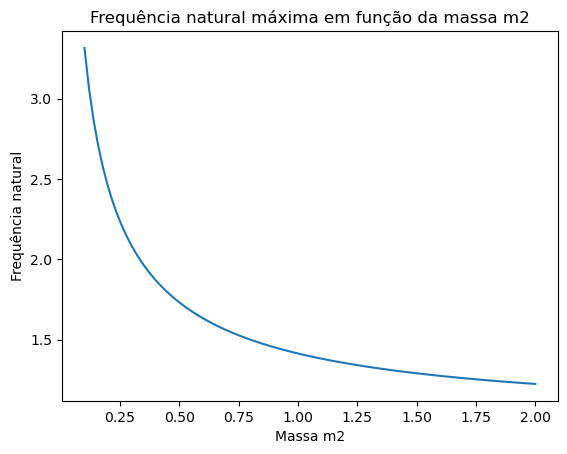

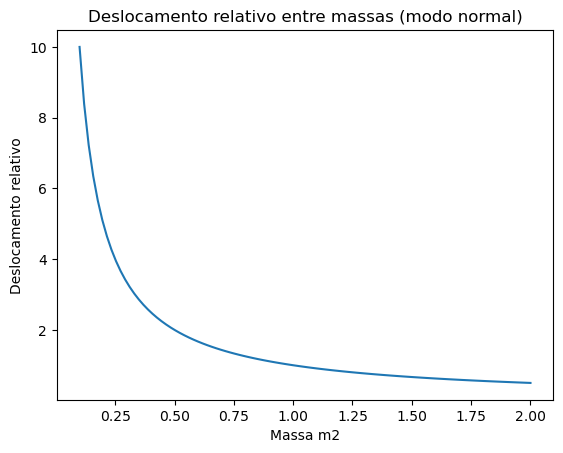

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

m2 = np.linspace(0.1, 2, 100)
m1 = 1  # massa fixa
k = 1   # constante da mola

modos = []
desloc_relativo = []

for m2n in m2:
    # Matriz de coeficientes do sistema
    B = np.array([[k/m1, -k/m1], [-k/m2n, k/m2n]])
    autovalores, autovetores = eig(B)
    
    # Seleciona o maior autovalor (frequência natural máxima)
    idx = np.argmax(autovalores)
    freq_natural = np.sqrt(autovalores[idx])
    modos.append(freq_natural)
    
    # Autovetor correspondente ao maior autovalor (modo normal)
    modo_normal = autovetores[:, idx]
    # Normaliza para que o deslocamento da primeira massa seja 1
    modo_normal = -1*modo_normal / modo_normal[0]
    # Guarda o deslocamento relativo entre as massas
    desloc_relativo.append(modo_normal[1])

# Gráfico das frequências naturais
plt.plot(m2, modos, label='Frequência natural máxima')
plt.xlabel('Massa m2')
plt.ylabel('Frequência natural')
plt.title('Frequência natural máxima em função da massa m2')
plt.show()

# Gráfico do deslocamento relativo
plt.plot(m2, desloc_relativo, label='Deslocamento relativo (m2/m1)')
plt.xlabel('Massa m2')
plt.ylabel('Deslocamento relativo')
plt.title('Deslocamento relativo entre massas (modo normal)')
plt.show()